# Task 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

3.1 Data analysis

• What are the most listened songs? \
• Who are the most popular artists? \
• How is the distribution of song count for users 

In [2]:
# Load the data
song_df = pd.read_csv('song_dataset.csv')

In [3]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102627 entries, 0 to 102626
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user         102627 non-null  object
 1   song         102627 non-null  object
 2   play_count   102627 non-null  int64 
 3   title        102627 non-null  object
 4   release      102627 non-null  object
 5   artist_name  102627 non-null  object
 6   year         102627 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 5.5+ MB


In [4]:
song_df.duplicated().sum()

np.int64(1055)

In [5]:
song_df.head()

,user,song,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,Nothing from Nothing,To Die For,Billy Preston,1974
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,Under Cold Blue Stars,Under Cold Blue Stars,Josh Rouse,2002
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1,Riot Radio (Soundtrack Version),Nick & Norah's Infinite Playlist - Original Mo...,The Dead 60s,0


In [6]:
# find the the max play_count value of the song titles
most_listened_songs=song_df.groupby('song',observed=True)['play_count'].sum().sort_values(ascending=False)[:10]
result = pd.DataFrame(most_listened_songs).merge(song_df[['song', 'title']].drop_duplicates(),left_index=True,right_on='song')[['title', 'play_count']]
result.reset_index(drop=True, inplace=True)
print(result)

                                               title  play_count
0                                              Words        1890
1                                     You're The One        1689
2                                            Revelry        1490
3                                               Undo        1443
4  Horn Concerto No. 4 in E flat K495: II. Romanc...         921
5                                  Paradise & Dreams         805
6                                      Sehr kosmisch         795
7                                            Secrets         712
8                                   Somebody To Love         692
9                                       Use Somebody         660


In [7]:
#  find the most popular song
most_popular_song=song_df.groupby('song',observed=True)['user'].nunique().sort_values(ascending=False)[:10]
result =pd.DataFrame(most_popular_song).merge(song_df[['song','title']],on='song',how='left').drop_duplicates().reset_index(drop=True)
print("the 10 most popular songs\n", result)

the 10 most popular songs
                  song  user                                              title
0  SOFRQTD12A81C233C0   221                                      Sehr kosmisch
1  SOAUWYT12A81C206F1   197                                               Undo
2  SOAXGDH12A8C13F8A1   190                     Dog Days Are Over (Radio Edit)
3  SOSXLTC12AF72A7F54   178                                            Revelry
4  SOBONKR12A58A7A7E0   177                                     You're The One
5  SONYKOW12AB01849C9   175                                            Secrets
6  SOEGIYH12A6D4FC0E3   144  Horn Concerto No. 4 in E flat K495: II. Romanc...
7  SOLFXKT12AB017E3E0   142                                          Fireflies
8  SOFLJQZ12A6D4FADA6   130                                           Tive Sim
9  SODJWHY12A8C142CCE   125                                   Hey_ Soul Sister


In [8]:
#  find the most popular artists
most_popular_artist=song_df.groupby('artist_name',observed=True)['play_count'].sum().sort_values(ascending=False)[:10]
print("the 10 most popular artists\n", most_popular_artist)

the 10 most popular artists
 artist_name
Kings Of Leon             2765
The Black Keys            1912
Jack the Ripper           1890
Coldplay                  1830
Dwight Yoakam             1705
Florence + The Machine    1682
Eminem                    1650
Björk                     1526
Justin Bieber             1504
Guns N' Roses             1309
Name: play_count, dtype: int64


In [9]:
#  find the most popular artists for users
most_popular_artist=song_df.groupby('artist_name',observed=True)['user'].nunique().sort_values(ascending=False)[:10]
print("the 10 most popular artists\n", most_popular_artist)

the 10 most popular artists
 artist_name
Kings Of Leon             313
Coldplay                  284
Florence + The Machine    233
Björk                     224
OneRepublic               222
Harmonia                  221
Train                     209
Radiohead                 187
Dwight Yoakam             187
Eminem                    174
Name: user, dtype: int64


In [10]:
song_df['song'].unique()

array(['SOAKIMP12A8C130995', 'SOAPDEY12A81C210A9', 'SOBBMDR12A8C13253B',
       ..., 'SOZQRJI12AB01841C6', 'SOZSHVM12AB018417F',
       'SOECNFX12A8C143CEA'], dtype=object)

In [11]:
#the distribution of song count for users 
song_count=song_df.groupby('user',observed=True)['song'].count().sort_values(ascending=True)


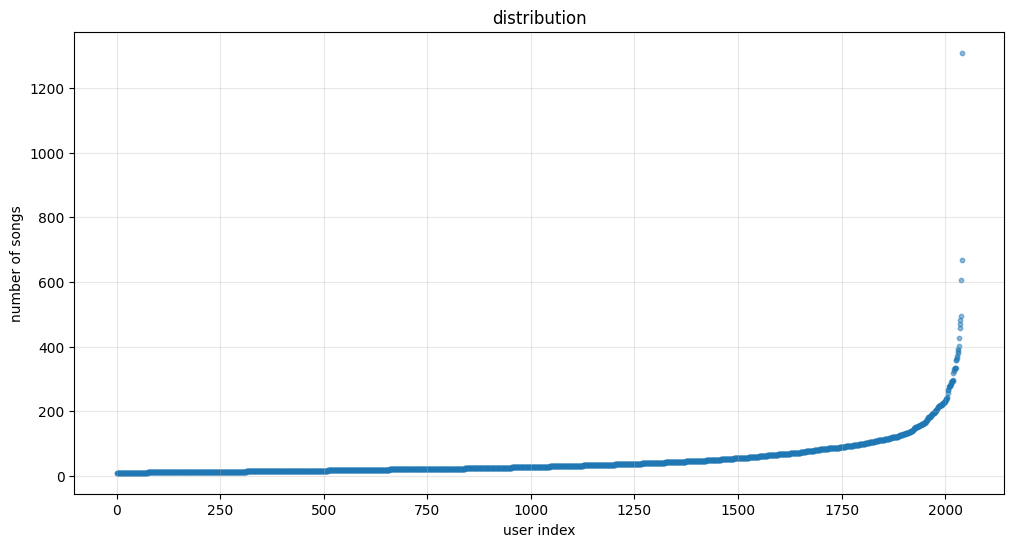

In [12]:
plt.figure(figsize=(12, 6))
plt.scatter(range(len(song_count)), song_count.values, alpha=0.5, s=10)
plt.title('distribution')
plt.xlabel('user index')
plt.ylabel('number of songs')
plt.grid(True, alpha=0.3)
plt.show()

# 3.1.2 EDA for song dataset

In [13]:
len(song_df['song'])

102627

In [14]:
user_count = song_df['user'].nunique()
print(user_count)

2042


In [15]:
song_count = song_df['song'].nunique()
print(song_count)

44458


In [16]:
release_count = song_df['release'].nunique()
print(release_count)

20164


In [17]:
year_count = song_df['year'].unique()
print(year_count)

[   0 1974 1976 2002 2006 2008 2007 2005 1999 1993 1989 2004 2009 1959
 1992 1983 1998 2001 1985 1987 2003 1997 2010 1984 1990 1981 1968 1986
 1991 1963 1982 1967 1996 1964 2000 1988 1994 1995 1973 1978 1979 1975
 1965 1962 1972 1971 1970 1977 1980 1969 1960 1956 1966 1954 1957 1955
 1958 1961 1948 1929 1953 1947 1950 1937 1945 1940]


In [18]:
song_df.duplicated().sum()

np.int64(1055)

In [19]:
year_zero_count = song_df[song_df['year'] == 0]['year'].count()
print(year_zero_count)

19283


# 3.1.3 Constructing a user profile

average play count:  2.778571567529206
max play count:  1890
min play count:  1


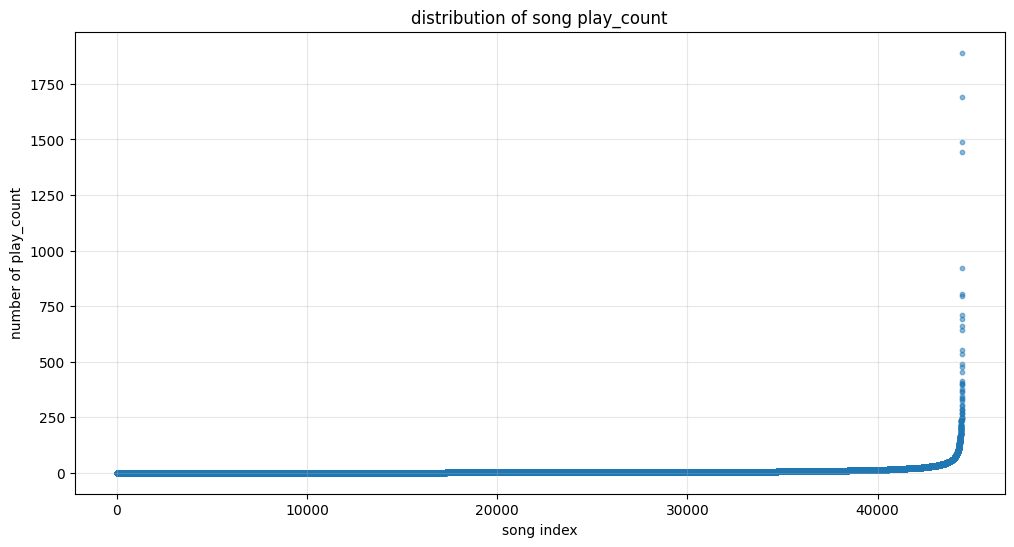

In [20]:
# Average number of times a song has been played, maximum and minimum values
average_play_count = song_df.groupby('song',observed=True)['play_count'].mean().mean()
max_play_count = song_df.groupby('song',observed=True)['play_count'].max().max()
min_play_count = song_df.groupby('song',observed=True)['play_count'].min().min()
print("average play count: ", average_play_count)
print("max play count: ", max_play_count)
print("min play count: ", min_play_count)
#the distribution of song play_count for songs
song_play_count=song_df.groupby('song',observed=True)['play_count'].sum().sort_values(ascending=True)
plt.figure(figsize=(12, 6))
plt.scatter(range(len(song_play_count)), song_play_count.values, alpha=0.5, s=10)
plt.title('distribution of song play_count')
plt.xlabel('song index')
plt.ylabel('number of play_count')
plt.grid(True, alpha=0.3)
plt.show()

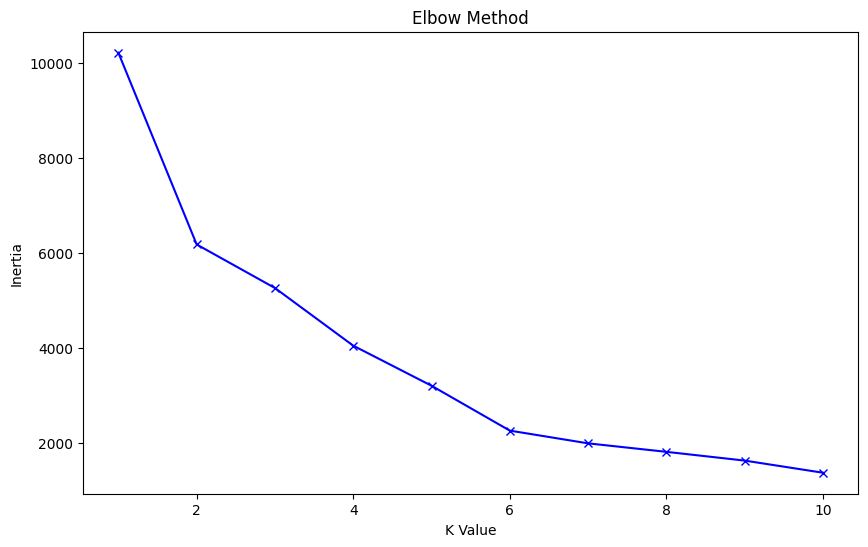

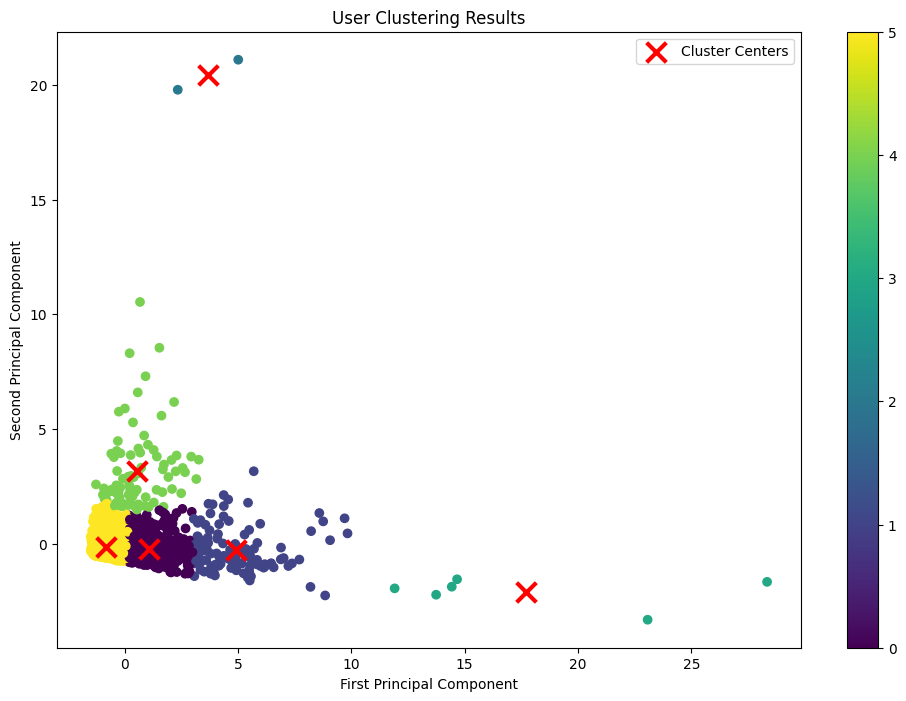


Mean Features for Each Cluster:
         total_plays  unique_songs  unique_artists  unique_release  \
Cluster                                                              
0         217.210526     82.663616       49.681922       62.638444   
1         585.504505    215.396396      105.819820      144.927928   
2        1531.500000     20.000000       12.000000       14.000000   
3        1398.333333    650.833333      332.333333      445.000000   
4         458.569767     35.476744       22.139535       26.988372   
5          60.970000     23.550714       16.371429       19.357857   

         avg_plays_per_artists  
Cluster                         
0                     3.682485  
1                     4.269666  
2                   110.137427  
3                     3.061642  
4                    18.982034  
5                     3.285272  


In [21]:
user_features = pd.DataFrame()
user_features['total_plays'] = song_df.groupby('user', observed=True)['play_count'].sum()
user_features['unique_songs'] = song_df.groupby('user', observed=True)['song'].nunique()
user_features['unique_artists'] = song_df.groupby('user', observed=True)['artist_name'].nunique()
user_features['unique_release'] = song_df.groupby('user', observed=True)['release'].nunique()
user_features['avg_plays_per_artists'] = (song_df.groupby('user', observed=True)['play_count'].sum() / 
                                        song_df.groupby('user', observed=True)['release'].nunique())
# why not consider the year，because year have too much zeros

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(user_features)
# Use Elbow Method to find the optimal K
from sklearn.cluster import KMeans
inertias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertias.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('K Value')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

best_k = 6 # Choose best k based on elbow plot
kmeans = KMeans(n_clusters=best_k, random_state=42)
user_features['Cluster'] = kmeans.fit_predict(features_scaled)

pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], 
                     c=user_features['Cluster'], cmap='viridis')
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0],
           pca.transform(kmeans.cluster_centers_)[:, 1], 
           marker='x', s=200, linewidths=3, color='r', label='Cluster Centers')
plt.colorbar(scatter)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('User Clustering Results')
plt.legend( )
plt.show()
cluster_means = user_features.groupby('Cluster').mean()
print("\nMean Features for Each Cluster:")
print(cluster_means)

In [22]:
components = pd.DataFrame(
    pca.components_,
    columns=user_features.drop('Cluster', axis=1).columns,
    index=['PC1', 'PC2']
)

print("PCA Components Weights:")
print(components)

PCA Components Weights:
     total_plays  unique_songs  unique_artists  unique_release  \
PC1      0.45429      0.510571        0.506461        0.521849   
PC2      0.39465     -0.123320       -0.173850       -0.162138   

     avg_plays_per_artists  
PC1               0.064097  
PC2               0.878937  


In [23]:
cluster_stats = user_features.groupby('Cluster').agg({
    'total_plays': ['mean','sum'],
    'unique_songs': 'mean',
    'unique_artists': 'mean',
    'unique_release': 'mean',
    'avg_plays_per_artists': 'mean',
}).round(2)
print("Cluster Statistics:")
print(cluster_stats)

cluster_sizes = user_features['Cluster'].value_counts(normalize=True).round(3) * 100
print("\nCluster Size Percentages:")
print(cluster_sizes.sort_index().map(lambda x: f"{x}%"))

Cluster Statistics:
        total_plays        unique_songs unique_artists unique_release  \
               mean    sum         mean           mean           mean   
Cluster                                                                 
0            217.21  94921        82.66          49.68          62.64   
1            585.50  64991       215.40         105.82         144.93   
2           1531.50   3063        20.00          12.00          14.00   
3           1398.33   8390       650.83         332.33         445.00   
4            458.57  39437        35.48          22.14          26.99   
5             60.97  85358        23.55          16.37          19.36   

        avg_plays_per_artists  
                         mean  
Cluster                        
0                        3.68  
1                        4.27  
2                      110.14  
3                        3.06  
4                       18.98  
5                        3.29  

Cluster Size Percentages:
Cluster

# User analysis
Based on the above analysis, we can find that there are very few audiophiles, accounting for only about 5% i.e. clusters 2 to 4. Cluster 5 is the mainstream users of the platform, which are light users. They listen to a very narrow range of music and only listen to it on average about 61 times, while 21.4% of the main users account for about one third of the plays and are characterised by not being more attracted to particular artists, as is the case with the light users. The remaining 5.4 per cent of users account for the other third, and they seem to have more of their own favourite styles.

# 3.2 Reconmandation 

According to the above analysis, facing light and mainstream users still give priority to similarity and breadth recommendation, so that they can find their favourite style and improve their platform stickiness.
It is better to use collaborative filtering algorithm here.

In the face of deep users, perhaps we can change the strategy, that is, based on the similarity of the song to make recommendations.

# 3.2.1  data processing

First merge the duplicates. Because there is no apparent time series in this data, the duplicate columns are removed.

In [24]:
print(len(song_df))
print(song_df.duplicated().sum())
song_df = song_df.groupby(['song', 'title', 'artist_name', 'release', 'year', 'user'], observed=True)['play_count'].sum().reset_index()
print(len(song_df))
print(song_df.duplicated().sum())
song_df.head()

102627
1055
101572
0


,song,title,artist_name,release,year,user,play_count
0,SOAAAGQ12A8C1420C8,Orgelblut,Bohren & Der Club Of Gore,Dolores,2008,3ff7a31452eeabd7a4e07f0d243c674e3d0adf46,5
1,SOAAAGQ12A8C1420C8,Orgelblut,Bohren & Der Club Of Gore,Dolores,2008,be0db87ab60e3a2de60354f34d9e37341b65eb1e,1
2,SOAABMP12A6D4F7633,Goomba Boomba,Yma Sumac,Mambo! (World),1954,e8ebf671cf99a8dc0b2301a36d3207004777c636,2
3,SOAABVA12AC3DF673F,Can't Get Over You,Vivian Girls,Everything Goes Wrong,2009,4aaa6038242f092a33b49558f59a94f0f47b6c5c,2
4,SOAACPJ12A81C21360,Cearc Agus Coileach / The Hen And Cock,Mícheál Ó Súilleabháin,Casadh/Turning,0,0aae3885afd9ec62df38635031d1e00cf7c091db,1


In [25]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Logarithmic normalisation, dealing with extreme values

In [26]:
song_df.describe()

,year,play_count
count,101572.000000,101572.000000
mean,1622.121618,2.915764
std,783.703332,8.628572
min,0.000000,1.000000
25%,1984.000000,1.000000
50%,2002.000000,1.000000
75%,2007.000000,3.000000
max,2010.000000,1890.000000



# Model selection:

Traditional music recommendation, is based on the similarity of users or items for recommendation, representative algorithms are collaborative filtering, or SVD, KNN, etc.

For some complex patterns, such as the small percentage of users clustered above. It is common to take a hybrid recommendation approach that combine the advantages of multiple recommendation methods to generate more accurate and diverse recommendations.

Compared to the above methods, deep models have been found to be more advantageous in capturing implicit and nonlinear relationships. Deep neural networks are able to learn complex non-linear relationships and better capture the implicit interaction patterns between users and objects.

The problem faced, cold starts due to data sparsity. That is, how to solve it when faced with too little referenceable data.

In addition to the reasons above, we often encounter cold start, sparse data and other problems in recommender systems. Cold start is when a new user just joins with too little data, and it is difficult to get good recommendations based on playlists directly. The sparseness of the data, which may only account for 10% of all the user interactions with items in the data, leads to a lack of objectivity in the ratings. In this task, play_count as a user rating will result in the main recommendations being focused on very few items, as most items may only have 2 or 3 plays.


Rule-based Filtering

Nowadays, many people try to use GNN for recommendation, and I am also interested in it, so I practice it here, and according to the advantage of GNN is that the user's pattern can be fully recognised, as well as the relationship between the user and the song can be expressed in the model.
Based on the analyses in 3.1.3, the number of songs, number of artists, number of albums, and average number of plays can be used as user characteristics.

Unfortunately, GNN can't solve the cold start problem and is too computationally intensive I failed, it may perform well on the static song_datatsets dataset, and there are other ways to solve the sparsity problem, but it can't solve the two problems at the beginning, collaborative filtering is too simple, let's implement wide and deep

Wide & Deep Learning is a recommender system model that combines the strengths of Linear Models (Wide) and Deep Neural Networks (Deep), first proposed by Google in 2016 for use in the Google Play app shop recommender system. Its goal is to both remember (Memorization) historical rules and generalise (Generalization) to new users or items to achieve efficient recommendations.

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from torch.utils.data import Dataset, DataLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

class WideAndDeepModel(nn.Module):
    def __init__(self, num_users, num_songs, num_artists, num_releases, num_years,
                 embedding_dim=64, hidden_layers=[256, 128, 64]):
        super().__init__()
        
        self.wide = nn.Linear(5, 1)
        
        self.user_embedding = nn.Embedding(num_users, embedding_dim)
        self.song_embedding = nn.Embedding(num_songs, embedding_dim)
        self.artist_embedding = nn.Embedding(num_artists, embedding_dim)
        self.release_embedding = nn.Embedding(num_releases, embedding_dim)
        self.year_embedding = nn.Embedding(num_years, embedding_dim)
    
        deep_input_dim = embedding_dim * 5 + 1  
        self.deep_layers = nn.ModuleList()
        prev_dim = deep_input_dim
        
        for hidden_dim in hidden_layers:
            self.deep_layers.append(nn.Linear(prev_dim, hidden_dim))
            self.deep_layers.append(nn.ReLU())
            self.deep_layers.append(nn.BatchNorm1d(hidden_dim))
            self.deep_layers.append(nn.Dropout(0.2))
            prev_dim = hidden_dim
        
        self.final = nn.Linear(hidden_layers[-1] + 1, 1)
        
    def forward(self, wide_features, user_ids, song_ids, artist_ids, 
                release_ids, year_ids, play_count):
        wide_out = self.wide(wide_features.float())
        
        user_emb = self.user_embedding(user_ids)
        song_emb = self.song_embedding(song_ids)
        artist_emb = self.artist_embedding(artist_ids)
        release_emb = self.release_embedding(release_ids)
        year_emb = self.year_embedding(year_ids)
        
        deep_input = torch.cat([
            user_emb, song_emb, artist_emb, release_emb, year_emb,
            play_count.unsqueeze(1)
        ], dim=1)
        
        deep_out = deep_input
        for layer in self.deep_layers:
            deep_out = layer(deep_out)
        
        final_input = torch.cat([deep_out, wide_out], dim=1)
        output = self.final(final_input)
        return output

class MusicDataset(Dataset):
    def __init__(self, df, is_training=True):
        self.is_training = is_training
        
        self.user_ids = torch.tensor(df['user_idx'].values, dtype=torch.long)
        self.song_ids = torch.tensor(df['song_idx'].values, dtype=torch.long)
        self.artist_ids = torch.tensor(df['artist_idx'].values, dtype=torch.long)
        self.release_ids = torch.tensor(df['release_idx'].values, dtype=torch.long)
        self.year_ids = torch.tensor(df['year_idx'].values, dtype=torch.long)
        
        self.wide_features = torch.tensor(
            df[['user_idx', 'song_idx', 'artist_idx', 'release_idx', 'year_idx']].values,
            dtype=torch.float
        )
        
        self.play_count = torch.tensor(df['play_count_log'].values, dtype=torch.float)
        
        if is_training:
            self.labels = torch.tensor(df['play_count_log'].values, dtype=torch.float)
            
    def __len__(self):
        return len(self.user_ids)
    
    def __getitem__(self, idx):
        if self.is_training:
            return {
                'wide_features': self.wide_features[idx],
                'user_ids': self.user_ids[idx],
                'song_ids': self.song_ids[idx],
                'artist_ids': self.artist_ids[idx],
                'release_ids': self.release_ids[idx],
                'year_ids': self.year_ids[idx],
                'play_count': self.play_count[idx],
                'labels': self.labels[idx]
            }
        else:
            return {
                'wide_features': self.wide_features[idx],
                'user_ids': self.user_ids[idx],
                'song_ids': self.song_ids[idx],
                'artist_ids': self.artist_ids[idx],
                'release_ids': self.release_ids[idx],
                'year_ids': self.year_ids[idx],
                'play_count': self.play_count[idx]
            }

def preprocess_data(song_df):
    le_user = LabelEncoder()
    le_song = LabelEncoder()
    le_artist = LabelEncoder()
    le_release = LabelEncoder()
    le_year = LabelEncoder()
    
    song_df['user_idx'] = le_user.fit_transform(song_df['user'])
    song_df['song_idx'] = le_song.fit_transform(song_df['song'])
    song_df['artist_idx'] = le_artist.fit_transform(song_df['artist_name'])
    song_df['release_idx'] = le_release.fit_transform(song_df['release'])
    song_df['year_idx'] = le_year.fit_transform(song_df['year'])
    
    song_df['play_count_log'] = np.log1p(song_df['play_count'])  # log1p = log(1+x)
    
    return song_df, le_user, le_song, le_artist, le_release, le_year

def train_model(model, train_loader, val_loader, optimizer, 
                patience=5, epochs=100, min_delta=1e-4):
    best_val_loss = float('inf')
    patience_counter = 0
    best_model_state = None
    
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for batch in train_loader:
            optimizer.zero_grad()
            
            outputs = model(
                batch['wide_features'].to(device),
                batch['user_ids'].to(device),
                batch['song_ids'].to(device),
                batch['artist_ids'].to(device),
                batch['release_ids'].to(device),
                batch['year_ids'].to(device),
                batch['play_count'].to(device)
            )
            
            loss = F.mse_loss(outputs.squeeze(), batch['labels'].to(device))
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
        
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch in val_loader:
                outputs = model(
                    batch['wide_features'].to(device),
                    batch['user_ids'].to(device),
                    batch['song_ids'].to(device),
                    batch['artist_ids'].to(device),
                    batch['release_ids'].to(device),
                    batch['year_ids'].to(device),
                    batch['play_count'].to(device)
                )
                loss = F.mse_loss(outputs.squeeze(), batch['labels'].to(device))
                val_loss += loss.item()
        
        train_loss /= len(train_loader)
        val_loss /= len(val_loader)
        
        print(f'Epoch {epoch+1}/{epochs}:')
        print(f'Training Loss: {train_loss:.4f}')
        print(f'Validation Loss: {val_loss:.4f}')
        
        if val_loss < best_val_loss - min_delta:
            best_val_loss = val_loss
            patience_counter = 0
            best_model_state = model.state_dict()
        else:
            patience_counter += 1
            
        if patience_counter >= patience:
            print(f'Early stopping triggered after {epoch + 1} epochs')
            model.load_state_dict(best_model_state)
            break
    
    return model


def get_user_recommendations(model, user_id, song_df, listened_songs, top_k=5):
    """
    Generate song recommendations for a user
    
    Args:
        model: Trained model
        user_id: Target user ID
        song_df: Song dataset
        listened_songs: List of songs already listened to by the user
        top_k: Number of recommendations to generate
        
    Returns:
        recommended_songs: List of recommended song IDs
        scores: List of recommendation scores
    """
    model.eval()
    with torch.no_grad():
        # Get unlistened songs
        available_songs = song_df[~song_df['song'].isin(listened_songs)]
        if available_songs.empty:
            return [], []
            
        # Get unique song information
        unique_songs = available_songs[['song_idx', 'song', 'artist_idx', 'release_idx', 'year_idx']].drop_duplicates('song_idx')
        unique_songs = unique_songs.sort_values('song_idx').reset_index(drop=True)
        num_songs = len(unique_songs)
        
        # Prepare features
        user_ids = torch.full((num_songs,), user_id, dtype=torch.long, device=device)
        song_ids = torch.tensor(unique_songs['song_idx'].values, dtype=torch.long, device=device)
        artist_ids = torch.tensor(unique_songs['artist_idx'].values, dtype=torch.long, device=device)
        release_ids = torch.tensor(unique_songs['release_idx'].values, dtype=torch.long, device=device)
        year_ids = torch.tensor(unique_songs['year_idx'].values, dtype=torch.long, device=device)
        
        # Batch processing
        batch_size = 1024
        all_scores = []
        
        for i in range(0, num_songs, batch_size):
            batch_end = min(i + batch_size, num_songs)
            batch_slice = slice(i, batch_end)
            
            # Wide features
            wide_features = torch.cat([
                user_ids[batch_slice].float().unsqueeze(1),
                song_ids[batch_slice].float().unsqueeze(1),
                artist_ids[batch_slice].float().unsqueeze(1),
                release_ids[batch_slice].float().unsqueeze(1),
                year_ids[batch_slice].float().unsqueeze(1)
            ], dim=1)
            
            play_count = torch.zeros(batch_end - i, device=device)
            
            # Get predictions
            scores = model(
                wide_features,
                user_ids[batch_slice],
                song_ids[batch_slice],
                artist_ids[batch_slice],
                release_ids[batch_slice],
                year_ids[batch_slice],
                play_count
            )
            all_scores.append(scores)
        
        # Combine all batch scores
        scores = torch.cat(all_scores, dim=0).squeeze()
        
        # Get top-k recommendations
        top_k_scores, top_k_indices = torch.topk(scores, k=min(top_k, len(scores)))
        
        # Get original song IDs
        recommended_songs = unique_songs.iloc[top_k_indices.cpu().tolist()]['song'].values.tolist()
        scores_list = top_k_scores.cpu().tolist()
        
        return recommended_songs, scores_list

    

Using device: cuda



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\20680\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\20680\AppData\Local\Programs\Python\Python312\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\20680\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel\kernelapp.py", 

In [28]:
import pickle

In [29]:
def split_data_by_user(song_df, train_ratio=0.8):
    users = song_df['user_idx'].unique()
    train_data = []
    val_data = []
    
    for user in users:
        user_data = song_df[song_df['user_idx'] == user]
        n_items = len(user_data)
        
        n_train = max(int(n_items * train_ratio), 1)
        n_train = min(n_train, n_items - 1) 
        
        user_data = user_data.sample(frac=1, random_state=42)
        
        train_data.append(user_data.iloc[:n_train])
        val_data.append(user_data.iloc[n_train:])
    
    train_df = pd.concat(train_data, ignore_index=True)
    val_df = pd.concat(val_data, ignore_index=True)
    
    return train_df, val_df
def main():
    """Main function to train and test the recommendation system"""
    print("Loading data...")
    song_df = pd.read_csv('song_dataset.csv')
    
    print("Preprocessing data...")
    processed_df, le_user, le_song, le_artist, le_release, le_year = preprocess_data(song_df)
    
    print("Splitting data...")
    train_df, val_df = split_data_by_user(processed_df, train_ratio=0.8)
    
    print(f"Training set size: {len(train_df)}")
    print(f"Validation set size: {len(val_df)}")
    
    train_dataset = MusicDataset(train_df)
    val_dataset = MusicDataset(val_df)
    
    train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=256)
    
    print("Initializing model...")
    model = WideAndDeepModel(
        num_users=len(le_user.classes_),
        num_songs=len(le_song.classes_),
        num_artists=len(le_artist.classes_),
        num_releases=len(le_release.classes_),
        num_years=len(le_year.classes_)
    ).to(device)
    
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    
    print("Training model...")
    model = train_model(
        model=model,
        train_loader=train_loader,
        val_loader=val_loader,
        optimizer=optimizer,
        patience=5,
        epochs=100,
        min_delta=1e-4
    )
    
    print("Saving model...")
    torch.save(model.state_dict(), 'music_recommender.pth')
    
    print("Saving label encoders...")
    with open('label_encoders.pkl', 'wb') as f:
        pickle.dump((le_user, le_song, le_artist, le_release, le_year), f)
    
    print("\nTesting recommendations...")
    user_idx = 0
    listened_songs = processed_df[processed_df['user_idx'] == user_idx]['song'].unique()
    recommended_songs, scores = get_user_recommendations(
        model=model,
        user_id=user_idx,
        song_df=processed_df,
        listened_songs=listened_songs,
        top_k=5
    )
    
    # Print recommendations
    print(f"\nRecommendations for user {le_user.inverse_transform([user_idx])[0]}:")
    for song_id, score in zip(recommended_songs, scores):
        song_info = song_df[song_df['song'] == song_id].iloc[0]
        print(f"Song: {song_info['title']} - {song_info['artist_name']}, Score: {score:.4f}")

if __name__ == "__main__":
    main()

Loading data...
Preprocessing data...
Splitting data...
Training set size: 81299
Validation set size: 21328
Initializing model...
Training model...
Epoch 1/100:
Training Loss: 98.6629
Validation Loss: 0.7564
Epoch 2/100:
Training Loss: 0.6553
Validation Loss: 0.4191
Epoch 3/100:
Training Loss: 0.3427
Validation Loss: 0.1153
Epoch 4/100:
Training Loss: 0.1496
Validation Loss: 0.0344
Epoch 5/100:
Training Loss: 0.1089
Validation Loss: 0.0230
Epoch 6/100:
Training Loss: 0.0892
Validation Loss: 0.0162
Epoch 7/100:
Training Loss: 0.0727
Validation Loss: 0.0141
Epoch 8/100:
Training Loss: 0.0642
Validation Loss: 0.0105
Epoch 9/100:
Training Loss: 0.0587
Validation Loss: 0.0109
Epoch 10/100:
Training Loss: 0.0566
Validation Loss: 0.0112
Epoch 11/100:
Training Loss: 0.0519
Validation Loss: 0.0088
Epoch 12/100:
Training Loss: 0.0487
Validation Loss: 0.0075
Epoch 13/100:
Training Loss: 0.0450
Validation Loss: 0.0090
Epoch 14/100:
Training Loss: 0.0422
Validation Loss: 0.0050
Epoch 15/100:
Traini

# 3.3 deployments

The following is just part of the code that is deployed on streamlit. The url is xxxxxxxxx.

In [ ]:
import streamlit as st
import torch
import pandas as pd
from model import WideAndDeepModel 
import pickle
from model import get_user_recommendations

# Fix file paths
MODEL_PATH = "music_recommender.pth"
DATA_PATH = "song_dataset.csv"
ENCODERS_PATH = "label_encoders.pkl"
@st.cache_resource
def load_model_and_data():
    try:
        song_df = pd.read_csv(DATA_PATH)
        
        with open(ENCODERS_PATH, 'rb') as f:
            le_dict = pickle.load(f)
            
        song_df['user_idx'] = le_dict[0].transform(song_df['user'])
        song_df['song_idx'] = le_dict[1].transform(song_df['song'])
        song_df['artist_idx'] = le_dict[2].transform(song_df['artist_name'])
        song_df['release_idx'] = le_dict[3].transform(song_df['release'])
        song_df['year_idx'] = le_dict[4].transform(song_df['year'].astype(str))
        
        model = WideAndDeepModel(
            num_users=len(le_dict[0].classes_),
            num_songs=len(le_dict[1].classes_),
            num_artists=len(le_dict[2].classes_),
            num_releases=len(le_dict[3].classes_),
            num_years=len(le_dict[4].classes_)
        )
        model.load_state_dict(torch.load(MODEL_PATH, map_location='cpu'))
        model.eval()
        
        return model, song_df, le_dict
        
    except Exception as e:
        st.error(f"error: {str(e)}")
        return None, None, None

def get_user_recommendations(model, user_id, song_df, listened_songs, top_k=5):
    model.eval()
    with torch.no_grad():
        # Get unlistened songs
        available_songs = song_df[~song_df['song'].isin(listened_songs)]
        if available_songs.empty:
            return [], []
            
        # Get unique song information
        unique_songs = available_songs[['song_idx', 'song', 'artist_idx', 'release_idx', 'year_idx']].drop_duplicates('song_idx')
        unique_songs = unique_songs.sort_values('song_idx').reset_index(drop=True)
        num_songs = len(unique_songs)
        
        # Prepare features
        user_ids = torch.full((num_songs,), user_id, dtype=torch.long)
        song_ids = torch.tensor(unique_songs['song_idx'].values, dtype=torch.long)
        artist_ids = torch.tensor(unique_songs['artist_idx'].values, dtype=torch.long)
        release_ids = torch.tensor(unique_songs['release_idx'].values, dtype=torch.long)
        year_ids = torch.tensor(unique_songs['year_idx'].values, dtype=torch.long)
        
        # Batch processing
        batch_size = 1024
        all_scores = []
        
        for i in range(0, num_songs, batch_size):
            batch_end = min(i + batch_size, num_songs)
            batch_slice = slice(i, batch_end)
            
            # Wide features
            wide_features = torch.stack([
                user_ids[batch_slice].float(),
                song_ids[batch_slice].float(),
                artist_ids[batch_slice].float(),
                release_ids[batch_slice].float(),
                year_ids[batch_slice].float()
            ], dim=1)
            
            play_count = torch.zeros(batch_end - i)
            
            # Get predictions
            scores = model(
                wide_features,
                user_ids[batch_slice],
                song_ids[batch_slice],
                artist_ids[batch_slice],
                release_ids[batch_slice],
                year_ids[batch_slice],
                play_count
            )
            all_scores.append(scores)
        
        # Combine all batch scores
        scores = torch.cat(all_scores, dim=0).squeeze()
        
        # Get top-k recommendations
        top_k_scores, top_k_indices = torch.topk(scores, k=min(top_k, len(scores)))
        
        # Get original song IDs and convert indices to list
        indices = top_k_indices.cpu().tolist()
        recommended_songs = unique_songs.iloc[indices]['song'].values.tolist()
        scores_list = top_k_scores.cpu().tolist()
        
        return recommended_songs, scores_list
def main():
    st.title("🎵 Music Recommendation System")
    
    # Load data and model
    model, song_df, le_dict = load_model_and_data()
    
    if model is None or song_df is None or le_dict is None:
        st.error("System initialization failed. Please ensure all required files exist.")
        st.stop()
    
    # Create song selector
    unique_songs = song_df[['title', 'artist_name']].drop_duplicates()
    song_options = [f"{row['title']} - {row['artist_name']}" 
                   for _, row in unique_songs.iterrows()]
    
    selected_songs = st.multiselect(
        "Select songs you've listened to:",
        options=song_options,
        max_selections=10
    )
    
    if st.button("Get Recommendations"):
        if selected_songs:
            with st.spinner("Generating recommendations..."):
                # Get song_ids for selected songs
                listened_songs = []
                for song in selected_songs:
                    title = song.split(" - ")[0]
                    artist = song.split(" - ")[1]
                    song_id = song_df[(song_df['title'] == title) & 
                                    (song_df['artist_name'] == artist)]['song'].iloc[0]
                    listened_songs.append(song_id)
                
                # Generate recommendations using the model
                recommended_songs, scores = get_user_recommendations(
                    model, 
                    user_id=0,  # Default ID for new users
                    song_df=song_df,
                    listened_songs=listened_songs,
                    top_k=5  # Recommend 5 songs
                )
                
                st.success("Recommendations generated!")
                
                # Display recommendations
                st.subheader("Recommended Songs:")
                for song_id, score in zip(recommended_songs, scores):
                    song_info = song_df[song_df['song'] == song_id].iloc[0]
                    with st.expander(f"🎵 {song_info['title']} - {song_info['artist_name']}"):
                        col1, col2 = st.columns(2)
                        with col1:
                            st.write(f"Artist: {song_info['artist_name']}")
                            st.write(f"Album: {song_info['release']}")
                        with col2:
                            st.write(f"Year: {song_info['year']}")
                            st.write(f"Match Score: {score:.2f}")
        else:
            st.warning("Please select at least one song!")
    
    st.markdown("---")
    st.markdown(
        """
        <div style='text-align: center'>
            <p>Music Recommendation System | Based on Wide & Deep Model</p>
        </div>
        """,
        unsafe_allow_html=True
    )

if __name__ == "__main__":
    main()

